## TD Control for Machine Replacement

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [56]:
def maintenance_cost(state):
    return state**2 + state

def cost_function(state, action, replacement_cost):
    if action == 0:
        return replacement_cost + maintenance_cost(0)
    else:
        return maintenance_cost(state)

In [57]:
# set total number of states and define a transition probability matrix of that size
num_states = 10
replacement_cost = 50
transition_probability = np.zeros((2,num_states,num_states))
max_episodes = 100000

In [58]:
C = [[cost_function(i, j, replacement_cost) for i in range(num_states)] for j in range(2)]
C = np.array(C)
C

array([[50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90]])

In [59]:
def fill_transition_probability_matrix(transition_probability, p=0.5):
    for j in range(transition_probability.shape[1]-1):
        transition_probability[1][j][j] = p
        transition_probability[1][j][j+1] = 1-p
    for i in range(transition_probability.shape[1]):
        for j in range(transition_probability.shape[2]):
            transition_probability[0][i][j] = transition_probability[1][0][j]
    transition_probability[1, transition_probability.shape[1]-1, transition_probability.shape[1]-1] = 1



In [60]:
def policy_visualization(policy):
    plt.bar(range(num_states), policy)
    plt.xlabel("State")
    plt.ylabel("Action")
    plt.show()

In [61]:
fill_transition_probability_matrix(transition_probability=transition_probability, p=0.2)
transition_probability

array([[[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]],

       [[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.2, 0.8, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ,

In [62]:
class EpsilonGreedyPolicy:
    def __init__(self):
        self.epsilon = 1

    def update(self, epsilon):
        self.epsilon = epsilon

    def policy(self, s, Q):
        if s not in Q or np.random.random() < self.epsilon:
            return np.random.randint(0,2)
        else:
            return np.argmin(Q[s])

    def final_policy(self, s, Q):
        if s not in Q:
            return 0
        return np.argmin(Q[s])

In [63]:
class SimpleGreedyPolicy:
    def update(self, epsilon): pass

    def policy(self, s, Q):
        if s not in Q:
            return np.random.randint(0,2)
        else:
            return np.argmin(Q[s])

    def final_policy(self, s, Q):
        if s not in Q:
            return 0
        return np.argmin(Q[s])

In [64]:
def sample_transition(state, action):
    cum_prob = 0
    sample = np.random.random(1)
    for i, prob in enumerate(transition_probability[action][state]):
        cum_prob += prob
        if sample < cum_prob:
            return i
    return num_states-1

[0 0 0 0 0 0 0 0 0 0]


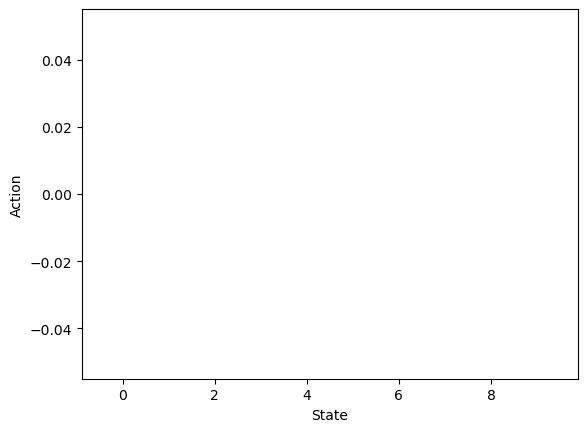

In [ ]:
policy_actions = np.argmin(Q, axis=1)
print(policy_actions)

policy_visualization(policy_actions)

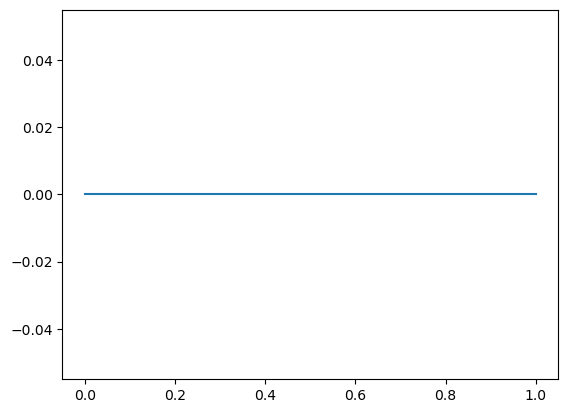

In [ ]:
V = np.min(Q, axis=0)

plt.plot(V)
plt.show()

### Known optimal policy for N=10

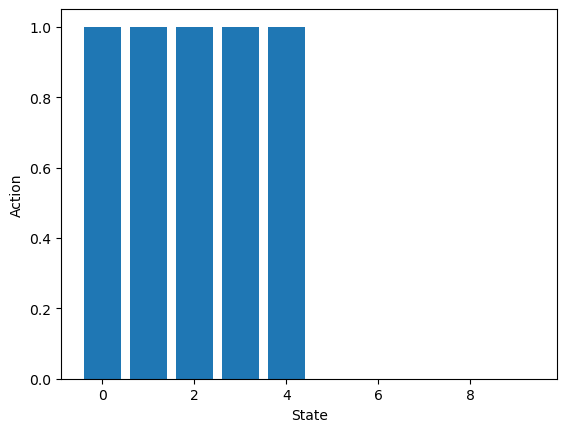

In [ ]:
optimal_policy = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
policy_visualization(optimal_policy)